In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import Libraries

# DS 
import os
from itertools import islice
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import seaborn as sns

# PLOTLY
import plotly.offline as po
import plotly.graph_objs as go

# SKLEARN
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import (GradientBoostingRegressor, 
                              GradientBoostingClassifier, 
                              AdaBoostClassifier,
                              AdaBoostRegressor,
                              RandomForestRegressor,
                              RandomForestClassifier)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, confusion_matrix, accuracy_score, plot_roc_curve
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

import warnings
warnings.filterwarnings('ignore')

# Aesthetic Plots
import mplcyberpunk
plt.style.use('cyberpunk')
%matplotlib inline

In [3]:
from src.gradient_clean_data import *

In [4]:
import datetime

In [5]:
# GLOBAL VARS
FSIZE = (12, 8)

In [6]:
# Load CSV
df = pd.read_csv('data/Train.csv')

In [7]:
df.saledate = df.saledate.apply(lambda x: datetime.datetime.strptime(str(x), '%m/%d/%Y %H:%M'))

In [8]:
df = df[df.saledate > datetime.datetime(2010, 1, 1)]

In [9]:
df.shape

(68587, 53)

In [10]:
df.head()

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
3   1139251      38500    1026470      332         121           3.0   
17  1139299       9500    1002713    21442         121           3.0   
30  1139363      51000     871201     1263         121           3.0   
33  1139369      14000    1050658     1918         121           3.0   
35  1139382      10000    1068548      112         121           3.0   

    YearMade  MachineHoursCurrentMeter UsageBand   saledate  ...  \
3       2001                    3486.0      High 2011-05-19  ...   
17      2003                       0.0       NaN 2010-01-28  ...   
30      1999                   15633.0      High 2010-10-22  ...   
33      1000                       0.0       NaN 2010-01-28  ...   
35      1000                    3981.0       Low 2011-06-09  ...   

   Undercarriage_Pad_Width         Stick_Length                Thumb  \
3                      NaN                  NaN                  NaN   
17                 16 inch  None or Unspecified  None or Unspecified   
30     None or Unspecified  None or Unspecified  None or Unspecified   
33                     NaN                  NaN                  NaN   
35                     NaN                  NaN                  NaN   

        Pattern_Changer Grouser_Type     Backhoe_Mounting  \
3                   NaN          NaN                  NaN   
17  None or Unspecified       Double                  NaN   
30  None or Unspecified       Double                  NaN   
33                  NaN          NaN  None or Unspecified   
35                  NaN          NaN                  NaN   

             Blade_Type      Travel_Controls Differential_Type  \
3                   NaN                  NaN               NaN   
17                  NaN                  NaN               NaN   
30                  NaN                  NaN               NaN   
33  None or Unspecified  None or Unspecified               NaN   
35                  NaN                  NaN          Standard   

   Steering_Controls  
3                NaN  
17               NaN  
30               NaN  
33               NaN  
35      Conventional  

[5 rows x 53 columns]

In [11]:
# Clean and Split
X, y = gradient_clean_Xy(df)

In [12]:
# Drop Datetime Column
X.drop(columns=['saledate'], inplace=True)

In [13]:
# Create labels to encode
to_encode = X.select_dtypes(include=['object']).columns.tolist()

# Encode Labels
X, encode_dict = encode_labels(X, to_encode)

In [14]:
# Plot Features
fig = plt.figure(figsize=(15,7), dpi=1600) # sets our figure size and resolution 

# Plot Targets
target = y
target_log = np.log(y) # transforms sales price
a=.65 # sets the alpha level

ax1 = plt.subplot2grid((2, 3), (0, 1))# creates a grid to hold mulptile plots, as well 
target.plot(kind='kde')         #    as the location of this plot in the grid
plt.title("Distribution of Sales"); plt.legend(loc='best')

ax2 = plt.subplot2grid((2, 3), (0, 2), colspan=2)
target_log.plot(kind='kde')
plt.title("Logged Distribution of Sales"); plt.legend(loc='best')

year_made = X["YearMade"].value_counts().sort_index()
ax3 = plt.subplot2grid((2, 3), (0, 0), colspan=1, rowspan=2)
year_made.plot(kind='barh', alpha=a)
plt.title("When were these bulldozers made?")
plt.xlabel('Count')
plt.ylabel('Year')

vehicle_size = X["ProductSize"].value_counts()
ax4 = plt.subplot2grid((2, 3), (1, 2), rowspan=2)
vehicle_size.plot(kind='bar',alpha=a)
plt.title("Distribution of Bulldozer Sizes")

usage_bands = X["UsageBand"].value_counts()
ax5 = plt.subplot2grid((2, 3), (1, 1))
usage_bands.plot(kind='bar', alpha=a)
plt.title("Distribution of Hours the Dozers were used. ")

fig.subplots_adjust(hspace=1, wspace=1)
plt.tight_layout()

In [15]:
# Train Test Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)    

In [16]:
# Create GradientBoostingRegressor Model
gb_model = GradientBoostingRegressor()

In [17]:
# Fit Model
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

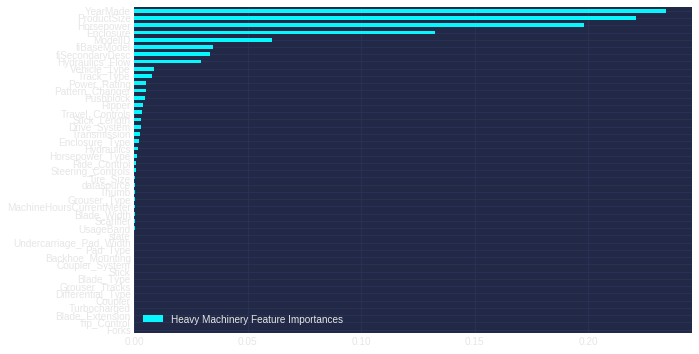

In [18]:
# Find Feature Importances via GB Model

# See and plot feature importances 
feat_scores = pd.DataFrame({'Heavy Machinery Feature Importances' : gb_model.feature_importances_},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Heavy Machinery Feature Importances')
feat_scores.plot(kind='barh', figsize=(10, 6))

In [19]:
# Gradient Boosting Prediction
y_pred = gb_model.predict(X_test)

In [20]:
# Change y_test to np array
# y_test = np.array(y_test.tolist())

In [21]:
# Find Accuracy using accuracy_score method
np.sqrt(mean_squared_error(y_test, y_pred))

10423.389574941424

In [22]:
max(y_test)

141000

In [23]:
max(y_pred)

140253.92224912505